#  Использование одномерных сверток в PyTorch

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html
* https://pytorch.org/docs/stable/generated/torch.nn.MaxPool1d.html#torch.nn.MaxPool1d
* https://wandb.ai/wandb_fc/wb-tutorials/reports/Tutorial-Text-Classification-Using-CNNs--Vmlldzo0NTIxNDI5
* https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

## Задачи для совместного разбора

1\. Изучите принцип работы одномерных сверточных слоев в `torch`

![1d conv](https://raw.githubusercontent.com/krzjoa/krzjoa.github.io/master/assets/img/2020-10-03-ts-and-torch-1/conv1d.gif)

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
conv = nn.Conv1d(
    in_channels=1,
    out_channels=7,
    kernel_size=3
)

In [ ]:
batch_size = 16
seq_len = 6
in_channels = 1
x = th.randint(0, 10, size=(batch_size, in_channels, seq_len)).float()
x.shape

torch.Size([16, 1, 6])

In [ ]:
out = conv(x)
out.shape

torch.Size([16, 7, 4])

![conv1d](https://www.macnica.co.jp/business/ai/blog/files/image5_2.png)

In [ ]:
batch_size = 16
seq_len = 20
in_channels = 3
x = th.randint(0, 10, size=(batch_size, in_channels, seq_len)).float()

In [ ]:
conv = nn.Conv1d(in_channels=3, out_channels=2, kernel_size=4)
out = conv(x)
out.shape

torch.Size([16, 2, 17])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите данные из файла `ts.csv`. Используя модель, состоящую из одного одномерного сверточного слоя, решите задачу предсказания $y_t$ по `k` предыдущим точкам временного ряда $x_{t-k}...x_{t-1}$. Исследуйте значения $k\in[1, 7]$. Для каждого $k$ выведите на экран итоговое значение функции потерь и веса ядра свертки. Визуализируйте исходный временной ряд и полученные прогнозы.

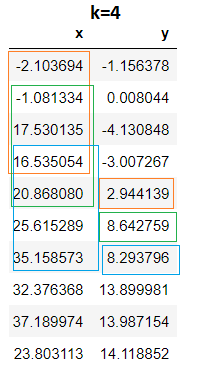

- [ ] Проверено на семинаре

In [63]:
import torch as th
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch.optim as optim

In [64]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import shutil

archive_path = '/content/drive/My Drive/ts.csv'
extract_path = 'ts.csv'
shutil.copy(archive_path, extract_path)


'ts.csv'

In [66]:
ts = pd.read_csv('ts.csv')
ts.head(10)

,x,y
0,-2.103694,-1.156378
1,-1.081334,0.008044
2,17.530135,-4.130848
3,16.535054,-3.007267
4,20.868080,2.944139
5,25.615289,8.642759
6,35.158573,8.293796
7,32.376368,13.899981
8,37.189974,13.987154
9,23.803113,14.118852


In [67]:
import torch

In [68]:
y = torch.Tensor(ts['y'])

In [69]:
predictions = {}

k = 1, Epoch 1, Loss 195.60719299316406, Weights tensor([0.7827], grad_fn=<ViewBackward0>)
k = 1, Epoch 11, Loss 185.1794891357422, Weights tensor([0.7727], grad_fn=<ViewBackward0>)
k = 1, Epoch 21, Loss 175.09246826171875, Weights tensor([0.7628], grad_fn=<ViewBackward0>)
k = 1, Epoch 31, Loss 165.3800506591797, Weights tensor([0.7529], grad_fn=<ViewBackward0>)
k = 1, Epoch 41, Loss 156.06053161621094, Weights tensor([0.7432], grad_fn=<ViewBackward0>)


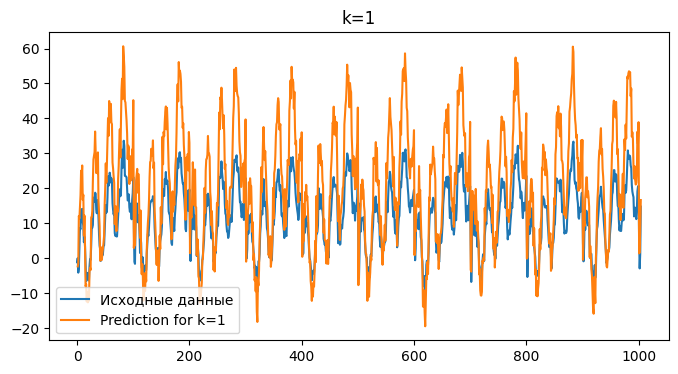

k = 2, Epoch 1, Loss 34.135074615478516, Weights tensor([-0.3924,  0.6864], grad_fn=<ViewBackward0>)
k = 2, Epoch 11, Loss 29.38831901550293, Weights tensor([-0.3825,  0.6963], grad_fn=<ViewBackward0>)
k = 2, Epoch 21, Loss 25.897369384765625, Weights tensor([-0.3730,  0.7055], grad_fn=<ViewBackward0>)
k = 2, Epoch 31, Loss 23.604454040527344, Weights tensor([-0.3643,  0.7133], grad_fn=<ViewBackward0>)
k = 2, Epoch 41, Loss 22.269014358520508, Weights tensor([-0.3567,  0.7192], grad_fn=<ViewBackward0>)


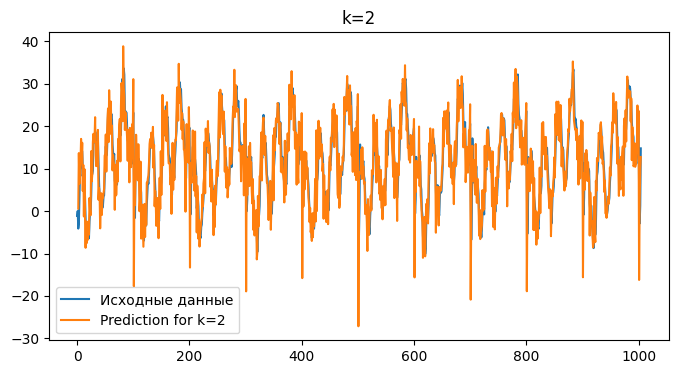

k = 3, Epoch 1, Loss 11.930777549743652, Weights tensor([-0.0383,  0.2855,  0.0821], grad_fn=<ViewBackward0>)
k = 3, Epoch 11, Loss 7.290693283081055, Weights tensor([-0.0286,  0.2952,  0.0919], grad_fn=<ViewBackward0>)
k = 3, Epoch 21, Loss 5.196117877960205, Weights tensor([-0.0206,  0.3034,  0.1005], grad_fn=<ViewBackward0>)
k = 3, Epoch 31, Loss 4.76609468460083, Weights tensor([-0.0161,  0.3083,  0.1068], grad_fn=<ViewBackward0>)
k = 3, Epoch 41, Loss 4.7427802085876465, Weights tensor([-0.0157,  0.3093,  0.1105], grad_fn=<ViewBackward0>)


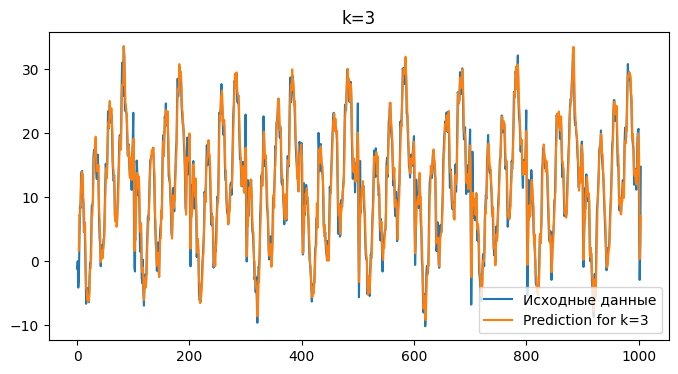

k = 4, Epoch 1, Loss 3601.6328125, Weights tensor([-0.4690, -0.3116, -0.4843,  0.0316], grad_fn=<ViewBackward0>)
k = 4, Epoch 11, Loss 3426.74169921875, Weights tensor([-0.4590, -0.3016, -0.4744,  0.0416], grad_fn=<ViewBackward0>)
k = 4, Epoch 21, Loss 3256.948486328125, Weights tensor([-0.4491, -0.2917, -0.4644,  0.0515], grad_fn=<ViewBackward0>)
k = 4, Epoch 31, Loss 3092.767578125, Weights tensor([-0.4392, -0.2818, -0.4546,  0.0614], grad_fn=<ViewBackward0>)
k = 4, Epoch 41, Loss 2934.486572265625, Weights tensor([-0.4294, -0.2721, -0.4448,  0.0711], grad_fn=<ViewBackward0>)


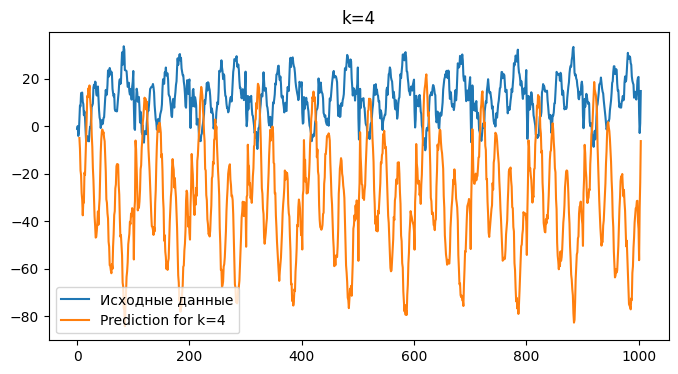

k = 5, Epoch 1, Loss 1830.2119140625, Weights tensor([-0.2849, -0.3860, -0.4371,  0.4220, -0.0890], grad_fn=<ViewBackward0>)
k = 5, Epoch 11, Loss 1677.392822265625, Weights tensor([-0.2749, -0.3760, -0.4272,  0.4320, -0.0791], grad_fn=<ViewBackward0>)
k = 5, Epoch 21, Loss 1532.415283203125, Weights tensor([-0.2650, -0.3661, -0.4173,  0.4419, -0.0692], grad_fn=<ViewBackward0>)
k = 5, Epoch 31, Loss 1395.9927978515625, Weights tensor([-0.2553, -0.3564, -0.4075,  0.4516, -0.0594], grad_fn=<ViewBackward0>)
k = 5, Epoch 41, Loss 1268.444091796875, Weights tensor([-0.2457, -0.3468, -0.3980,  0.4612, -0.0499], grad_fn=<ViewBackward0>)


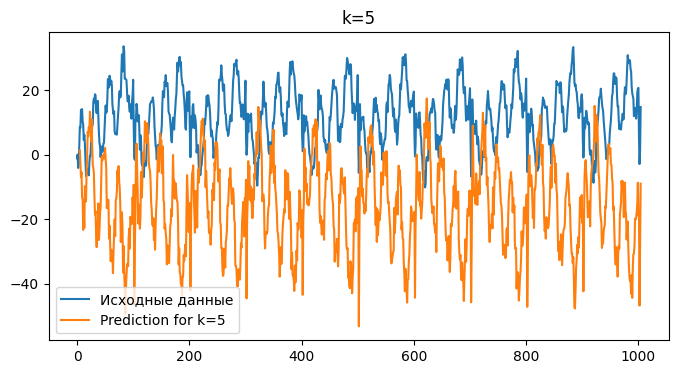

k = 6, Epoch 1, Loss 176.6877899169922, Weights tensor([ 0.0379, -0.3042,  0.3381, -0.0750, -0.0986,  0.1667],
       grad_fn=<ViewBackward0>)
k = 6, Epoch 11, Loss 127.66185760498047, Weights tensor([ 0.0478, -0.2943,  0.3480, -0.0650, -0.0887,  0.1767],
       grad_fn=<ViewBackward0>)
k = 6, Epoch 21, Loss 89.45014190673828, Weights tensor([ 0.0572, -0.2848,  0.3574, -0.0556, -0.0792,  0.1862],
       grad_fn=<ViewBackward0>)
k = 6, Epoch 31, Loss 61.998966217041016, Weights tensor([ 0.0658, -0.2761,  0.3660, -0.0469, -0.0704,  0.1950],
       grad_fn=<ViewBackward0>)
k = 6, Epoch 41, Loss 43.99256134033203, Weights tensor([ 0.0732, -0.2686,  0.3733, -0.0393, -0.0627,  0.2028],
       grad_fn=<ViewBackward0>)


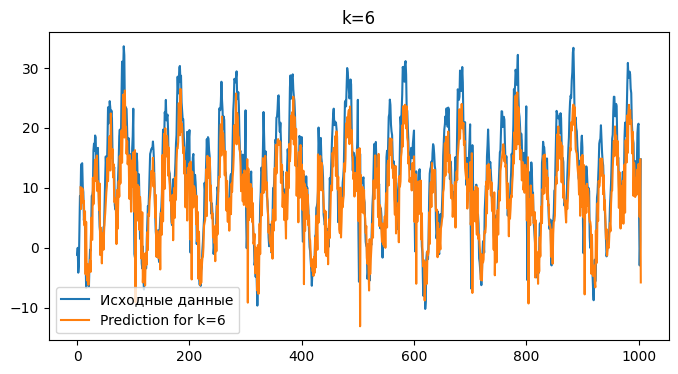

k = 7, Epoch 1, Loss 97.26476287841797, Weights tensor([ 0.1885, -0.1036,  0.0768, -0.0086,  0.2879,  0.1950, -0.3557],
       grad_fn=<ViewBackward0>)
k = 7, Epoch 11, Loss 85.54931640625, Weights tensor([ 0.1925, -0.0952,  0.0858,  0.0007,  0.2974,  0.2047, -0.3459],
       grad_fn=<ViewBackward0>)
k = 7, Epoch 21, Loss 79.88619995117188, Weights tensor([ 0.1836, -0.0961,  0.0894,  0.0065,  0.3047,  0.2131, -0.3369],
       grad_fn=<ViewBackward0>)
k = 7, Epoch 31, Loss 74.51853942871094, Weights tensor([ 0.1723, -0.1041,  0.0866,  0.0079,  0.3093,  0.2203, -0.3286],
       grad_fn=<ViewBackward0>)
k = 7, Epoch 41, Loss 69.37693786621094, Weights tensor([ 0.1611, -0.1133,  0.0816,  0.0075,  0.3130,  0.2271, -0.3205],
       grad_fn=<ViewBackward0>)


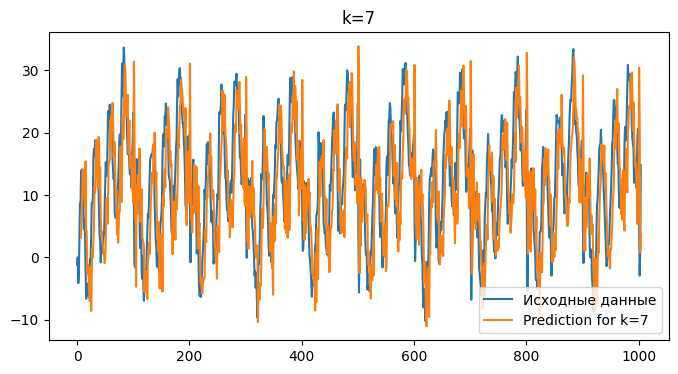

In [70]:
for k in range(1, 8):
    inputs = []

    for i in range(0, len(ts['x']) - k):
        window = torch.Tensor(list(ts['x'][i:i + k]))
        inputs.append(window)

    inputs = torch.stack(inputs).unsqueeze(1)
    conv = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=k)
    optimizer = torch.optim.Adam(conv.parameters(), lr=0.001)

    for epoch in range(50):
        output = conv(inputs).squeeze(dim=1)
        targets = y[k:].reshape(len(y[k:]), -1)
        criterion = nn.MSELoss()
        loss = criterion(output, targets)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


        if epoch % 10 == 0:
            print(f'k = {k}, Epoch {epoch+1}, Loss {loss.item()}, Weights {conv.weight.flatten()}')

    predictions[k] = output.squeeze(dim=1).detach().numpy()


    plt.figure(figsize=(8, 4))
    plt.plot(ts['y'], label='Исходные данные')
    plt.plot(np.arange(k, len(ts['y'])), predictions[k], label=f'Prediction for k={k}')
    plt.legend()
    plt.title(f'k={k}')
    plt.show()

<p class="task" id="2"></p>

2\. Загрузите файл `PV_Elec_Gas2.csv`. Опишите класс `ElectricityDataset`, который разбивает данные на окна в соответствии со следующей схемой:

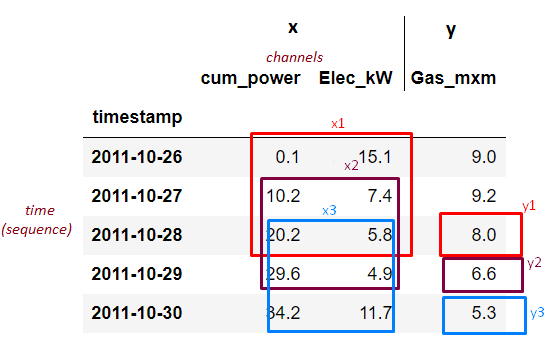

Разбейте набор данных на обучающую и тестовую выборку. Для теста оставьте данные за 2019 год.

- [ ] Проверено на семинаре

In [71]:
archive_path = '/content/drive/My Drive/PV_Elec_Gas2.csv'
extract_path = 'PV_Elec_Gas2.csv'
shutil.copy(archive_path, extract_path)

'PV_Elec_Gas2.csv'

In [72]:
df= pd.read_csv('PV_Elec_Gas2.csv')
df.head(10)

,Unnamed: 0,cum_power,Elec_kW,Gas_mxm
0,2011-10-26,0.1,15.1,9.0
1,2011-10-27,10.2,7.4,9.2
2,2011-10-28,20.2,5.8,8.0
3,2011-10-29,29.6,4.9,6.6
4,2011-10-30,34.2,11.7,5.3
5,2011-10-31,38.0,11.0,5.7
6,2011-11-01,46.6,3.5,5.3
7,2011-11-02,51.6,10.5,5.4
8,2011-11-03,58.6,6.9,7.6
9,2011-11-04,60.5,10.3,5.5


In [73]:
df.rename(columns={'Unnamed: 0': 'timestamp'}, inplace=True)
df.set_index('timestamp', inplace=True)

In [74]:
df.head(10)

,cum_power,Elec_kW,Gas_mxm
timestamp,,,
2011-10-26,0.1,15.1,9.0
2011-10-27,10.2,7.4,9.2
2011-10-28,20.2,5.8,8.0
2011-10-29,29.6,4.9,6.6
2011-10-30,34.2,11.7,5.3
2011-10-31,38.0,11.0,5.7
2011-11-01,46.6,3.5,5.3
2011-11-02,51.6,10.5,5.4
2011-11-03,58.6,6.9,7.6


In [75]:
class ElectricityDataset:
    def __init__(self, data):
        self.data = data

    def windows(self):
        windows_x = []
        windows_y = []

        for i in range(len(self.data) - 3):

            window_x = self.data.iloc[i:i+3][['cum_power', 'Elec_kW']].values
            window_y = self.data.iloc[i+3]['Gas_mxm']

            windows_x.append(window_x)
            windows_y.append(window_y)

        return torch.Tensor(np.array(windows_x)), torch.Tensor(np.array(windows_y))


In [76]:
ed = ElectricityDataset(df)
X, y = ed.windows()

In [77]:
list(df.index).index('2019-01-01')

2624

In [78]:
X_train, X_test, y_train, y_test = X[:2624], X[2624:], y[:2624], y[2624:]

<p class="task" id="3"></p>

3\. Решите задачу предсказания столбца `Gas_mxm` на основе столбцов `cum_power` и `Elec_kW` с использованием одномерных сверток. Для оптимизации используйте мини-пакетный градиентный спуск с использованием `DataLoader`. Обратите внимание, что при создании `DataLoader` вы не можете перемешивать данные.

Постройте график изменения значения функции потерь на обучающем и тестовом множестве в зависимости от номера эпохи. Визуализируйте на одном графике прогнозы модели и предсказываемый временной ряд.

- [ ] Проверено на семинаре

In [79]:
from torch.utils.data import DataLoader, TensorDataset

In [84]:
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=32)

In [85]:
model = nn.Conv1d(in_channels=3, out_channels=1, kernel_size=2)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [86]:
train_losses = []
test_losses = []


In [87]:
for epoch in range(50):
    model.train()
    train_loss = 0.0
    for data, target in train_loader:
        output = model(data)
        loss = criterion(output.squeeze(), target)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss += loss.item() * data.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        predictions = model(X_test)
        test_loss = criterion(predictions.squeeze(), y_test)
    test_losses.append(test_loss.item())

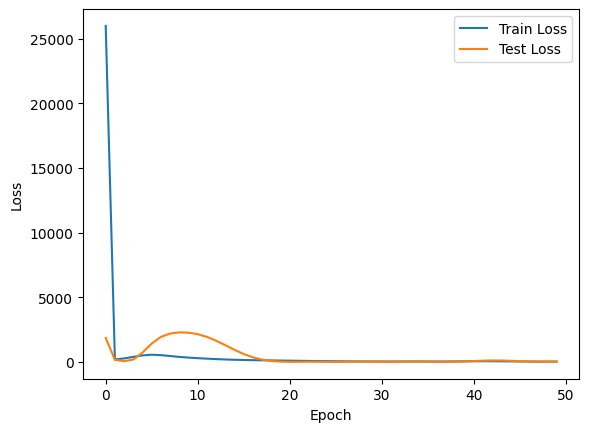

In [88]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

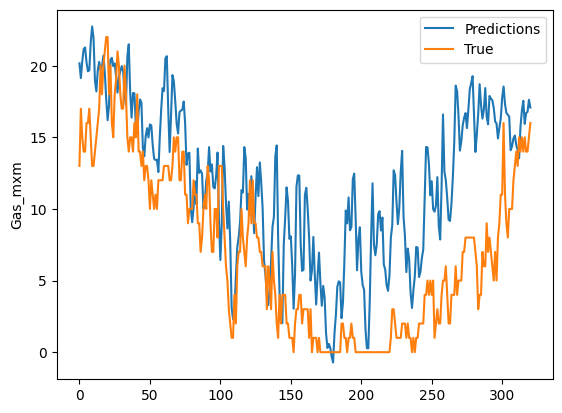

In [90]:
with torch.no_grad():
    predictions = model(X_test).squeeze().numpy()
    plt.plot(predictions, label='Predictions')
    plt.plot(y_test.squeeze().numpy(), label='True')
    plt.ylabel('Gas_mxm')
    plt.legend()
    plt.show()

<p class="task" id="4"></p>

4\. Считайте файлы `polarity/positive_reviews.txt` (положительные обзоры на фильмы) и `polarity/negative_reviews.txt` (отрицательные обозоры на фильмы) и разбейте на обучающую и тестовую выборку. Выполните предобработку текста и создайте Vocab на основе обучающей выборки (токен - слово). Выведите на экран количество токенов в полученном словаре.

Создайте класс `PolarityDataset` и реализуйте метод `__getitem__` таким образом, чтобы он возвращал набор индексов токенов (слов) для текста и метки классов для этих текстов. Создайте два объекта класса `PolarityDataset` для обучающей и тестовой выборки. Выведите на экраны количество элементов и распределение данных по классам в каждом из них.

- [ ] Проверено на семинаре

In [114]:
from sklearn.model_selection import train_test_split
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
archive_path = '/content/drive/My Drive/negative_reviews.txt'
extract_path = 'negative_reviews.txt'
shutil.copy(archive_path, extract_path)

'negative_reviews.txt'

In [95]:
archive_path = '/content/drive/My Drive/positive_reviews.txt'
extract_path = 'positive_reviews.txt'
shutil.copy(archive_path, extract_path)

'positive_reviews.txt'

In [100]:
with open('positive_reviews.txt', 'r', encoding='utf-8') as file:
    positive_reviews = file.readlines()

with open('negative_reviews.txt', 'r', encoding='utf-8') as file:
    negative_reviews = file.readlines()


In [104]:
reviews = positive_reviews + negative_reviews
labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)

In [105]:
df = pd.DataFrame({'review': reviews, 'label': labels})

In [109]:
df['review'] = df['review'].apply(lambda x: x.lower())

In [110]:
stop_words = set(stopwords.words('english'))


In [111]:
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

In [112]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [129]:
train_reviews = train_df['review'].tolist()
words = set(' '.join(train_reviews).split())

In [130]:
len(words)

18007

In [121]:
from torch.utils.data import Dataset

class PolarityDataset(Dataset):
    pass

<p class="task" id="5"></p>

5\. Решите задачу классификации текстов обзоров с использованием одномерных сверток. Для преобразования последовательности индексов в последовательность векторов используйте слой `nn.Embedding`. Обратите внимание, что `nn.Conv1d` ожидает на вход трехмерный тензор размерности `(batch, embedding_dim, seq_len)`. Выведите на экран отчет по классификации для обучающей и тестовой выборки после завершения процесса обучения. Добейтесь accuracy на тестовой выборке не менее 70%.

- [ ] Проверено на семинаре

<p class="task" id="6"></p>

6\. Придумайте небольшой отзыв, прогоните его через модель и выведите метку предсказанного класса (позитивный или негативный). Сделайте это для явно позитивного и явно негативного отзыва.

- [ ] Проверено на семинаре

## Обратная связь
- [ ] Хочу получить обратную связь по решению